Complete the exercises below For **Assignment #3**.

## Linear model with one numerical variable

Execute the following cell to load the [ISLR2](https://cran.rstudio.com/web/packages/ISLR2/index.html) and [Tidverse](https://www.tidyverse.org/) packages.

In [2]:
library('tidyverse')
library('ISLR2')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


The `ISLR2` package provides a dataset called `Boston` that we will use in this assignment.

In [3]:
Boston |> glimpse()

Rows: 506
Columns: 13
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ lstat   <dbl> 4.98, 9.14, 4.03, 2.94, 5.33, 5.21, 12.43, 19.15, 29.93, 17.10…
$ medv    <dbl> 24

🚨 Use the **Jupyter Lab Contextual Help Feature** to see the documentation for this data. 

❓ **In the markdown cell below, add definitions for the `lstat` and `medv` variables in the `Boston` data.** 

- `lstat`: The percent of the population in the lower status in each town near Boston 
- `medv`: The median value of an owner occupied home (in $1,000s)

Let's plot `medv` (y-axis) versus `lstat`.

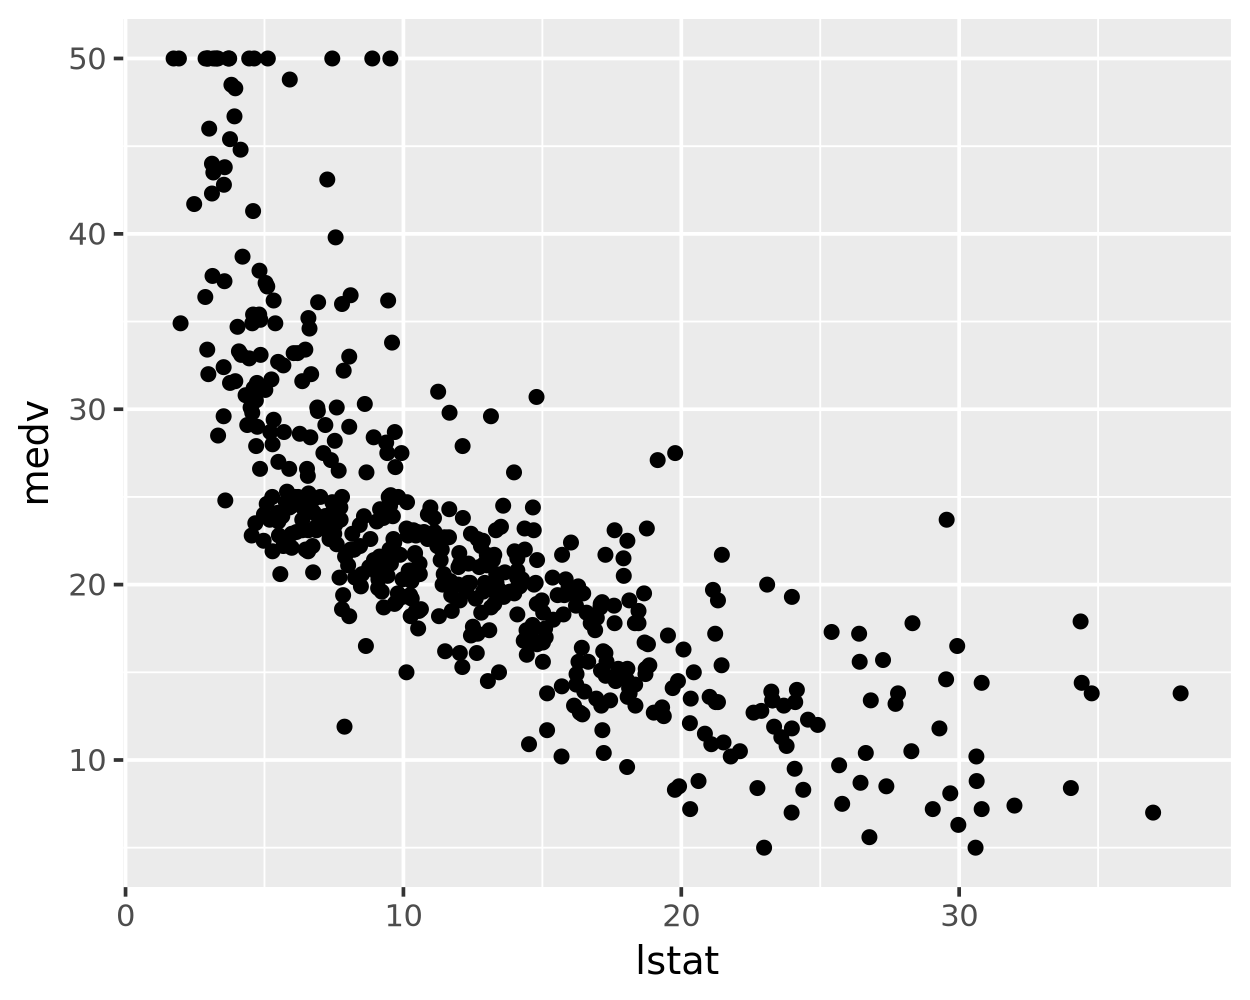

In [4]:
p = ggplot(Boston, aes(x = lstat, y = medv)) + geom_point()

p

❓Does the relationship appear to be positive or negative? Does it look to be reasonably linear?

**Answer:** The relationship appear to be negative and reasonably linear

### Let's build a model!

We need to first load the [Tidymodels]() package.

In [5]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



First we specify our model as `linear regression` using the `lm` engine.

In [6]:
mod = linear_reg() |> set_engine("lm")

mod

Linear Regression Model Specification (regression)

Computational engine: lm 


Next we "fit" our model by supplying the `formula` and the data.

In [7]:
mod_fit = mod |> fit(medv ~ lstat, data = Boston)

mod_fit

parsnip model object


Call:
stats::lm(formula = medv ~ lstat, data = data)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


### Get the regression table

In [8]:
# We can use the tidy function to get a table of our model information
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),34.5538409,0.56262735,61.41515,3.743081e-236
lstat,-0.9500494,0.03873342,-24.52790,5.081103e-88


❓Comparing on the chart above and the regression table, does the **sign** of the `estimate` for the `lstat` term coefficient fit your expectations?

**Answer:** Yes, the estimate for lstat is negative indicating the relationship between median home values and lower income status populations (i.e. Home Values are higher in areas with a low percentage of low income status)

### Making predictions and visualizing the model

We can use the `augment` function to "predict" `medv` for all the values in our original dataset. We will capture these predictions in a new data frame called `Boston2`. The predicted values are found in the `.pred` column.

In [9]:
Boston2 = augment(mod_fit, Boston)

glimpse(Boston2)

Rows: 506
Columns: 15
$ .pred   <dbl> 29.822595, 25.870390, 30.725142, 31.760696, 29.490078, 29.6040…
$ .resid  <dbl> -5.8225951, -4.2703898, 3.9748580, 1.6393042, 6.7099222, -0.90…
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <int> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15

Let's visualize our model.

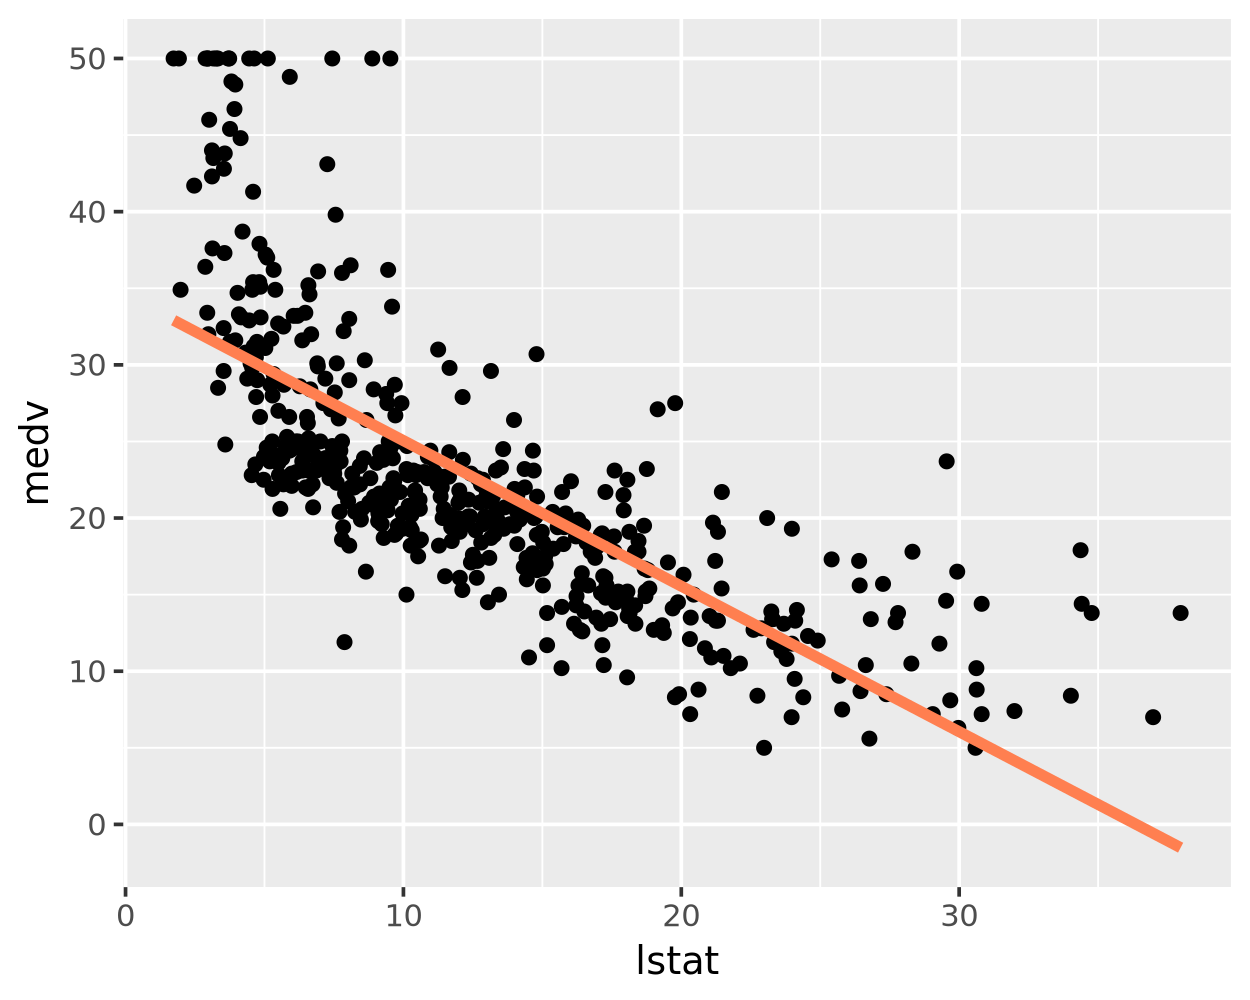

In [10]:
p = ggplot(Boston2, aes(x = lstat)) +
    geom_point(aes(y = medv)) + 
    geom_line(aes(y = .pred), color = 'coral', linewidth = 1.5)

p

### Put your skills to practice independently!

In cells below, build a model of `medv` with the `rm` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

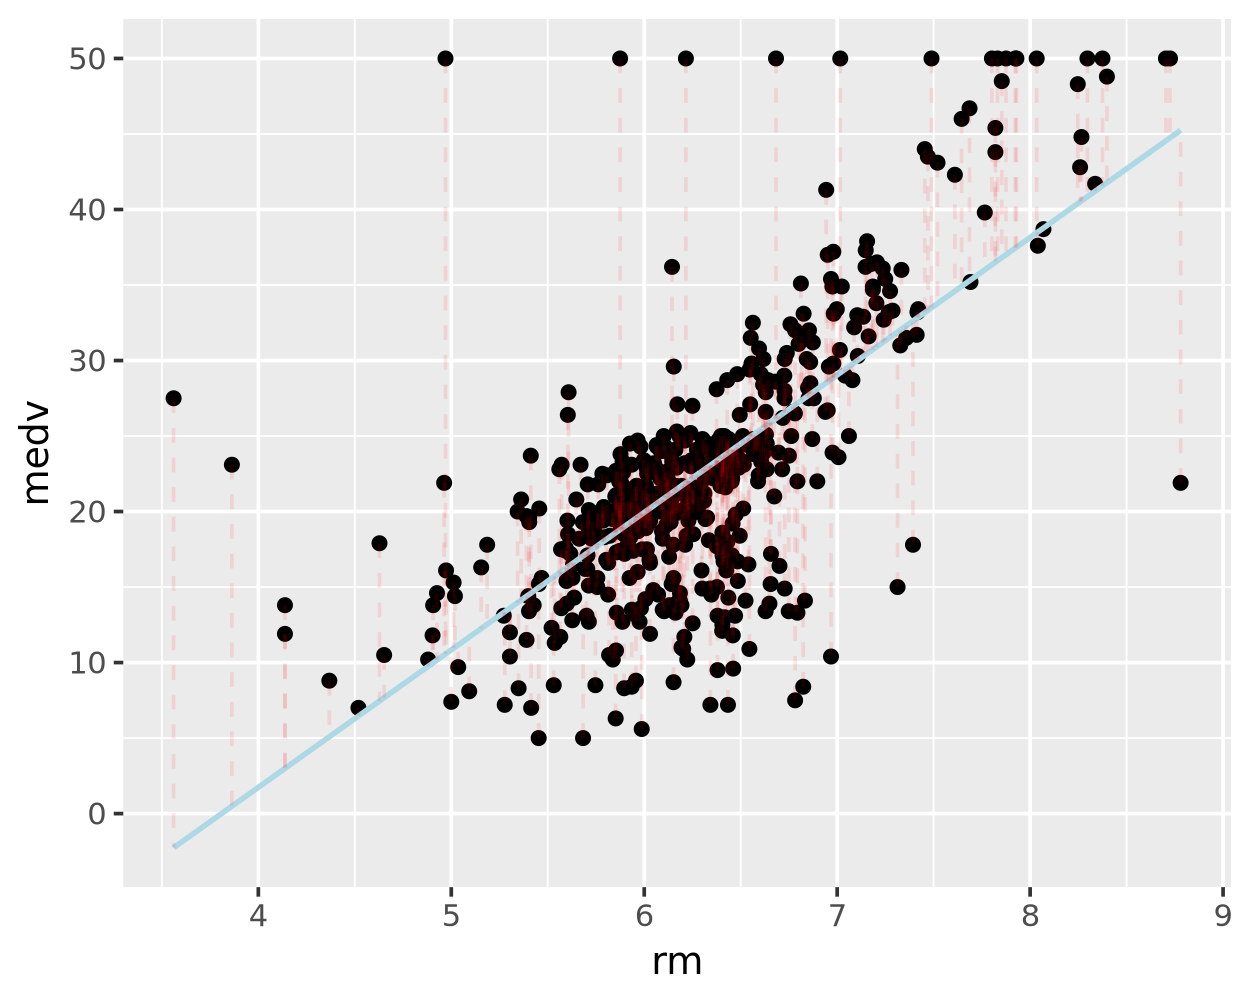

In [19]:
mod = linear_reg() %>% set_engine('lm')
mod_fit_boston = mod  %>% fit(medv ~ rm, data = Boston)
# tidy(mod_fit1)
Boston3 = augment(mod_fit_boston, Boston)
ggplot(Boston3, aes(x = rm)) + 
    geom_point(aes(y = medv)) + 
    geom_line(aes(y = .pred), color = 'lightblue', linewidth = 0.75) + 
    geom_segment(aes(yend = .pred, y = medv), alpha = 0.1, linetype = 'dashed', color = 'red')

❓Does your model indicate a positive relationship beteen number of rooms and home value? 

**Answer:** Yes, my model indicates a positive linear relationship between rooms and home value.

## Linear model with one categorical variable

We will use the `Carseats` data from the `ISLR2` package for the following exercise.

In [12]:
Carseats |> glimpse()

Rows: 400
Columns: 11
$ Sales       <dbl> 9.50, 11.22, 10.06, 7.40, 4.15, 10.81, 6.63, 11.85, 6.54, …
$ CompPrice   <dbl> 138, 111, 113, 117, 141, 124, 115, 136, 132, 132, 121, 117…
$ Income      <dbl> 73, 48, 35, 100, 64, 113, 105, 81, 110, 113, 78, 94, 35, 2…
$ Advertising <dbl> 11, 16, 10, 4, 3, 13, 0, 15, 0, 0, 9, 4, 2, 11, 11, 5, 0, …
$ Population  <dbl> 276, 260, 269, 466, 340, 501, 45, 425, 108, 131, 150, 503,…
$ Price       <dbl> 120, 83, 80, 97, 128, 72, 108, 120, 124, 124, 100, 94, 136…
$ ShelveLoc   <fct> Bad, Good, Medium, Medium, Bad, Bad, Medium, Good, Medium,…
$ Age         <dbl> 42, 65, 59, 55, 38, 78, 71, 67, 76, 76, 26, 50, 62, 53, 52…
$ Education   <dbl> 17, 10, 12, 14, 13, 16, 15, 10, 10, 17, 10, 13, 18, 18, 18…
$ Urban       <fct> Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, No, No, No, Yes, Ye…
$ US          <fct> Yes, Yes, Yes, Yes, No, Yes, No, Yes, No, Yes, Yes, Yes, N…


Below is a plot of `sales` versus `ShelveLoc`.

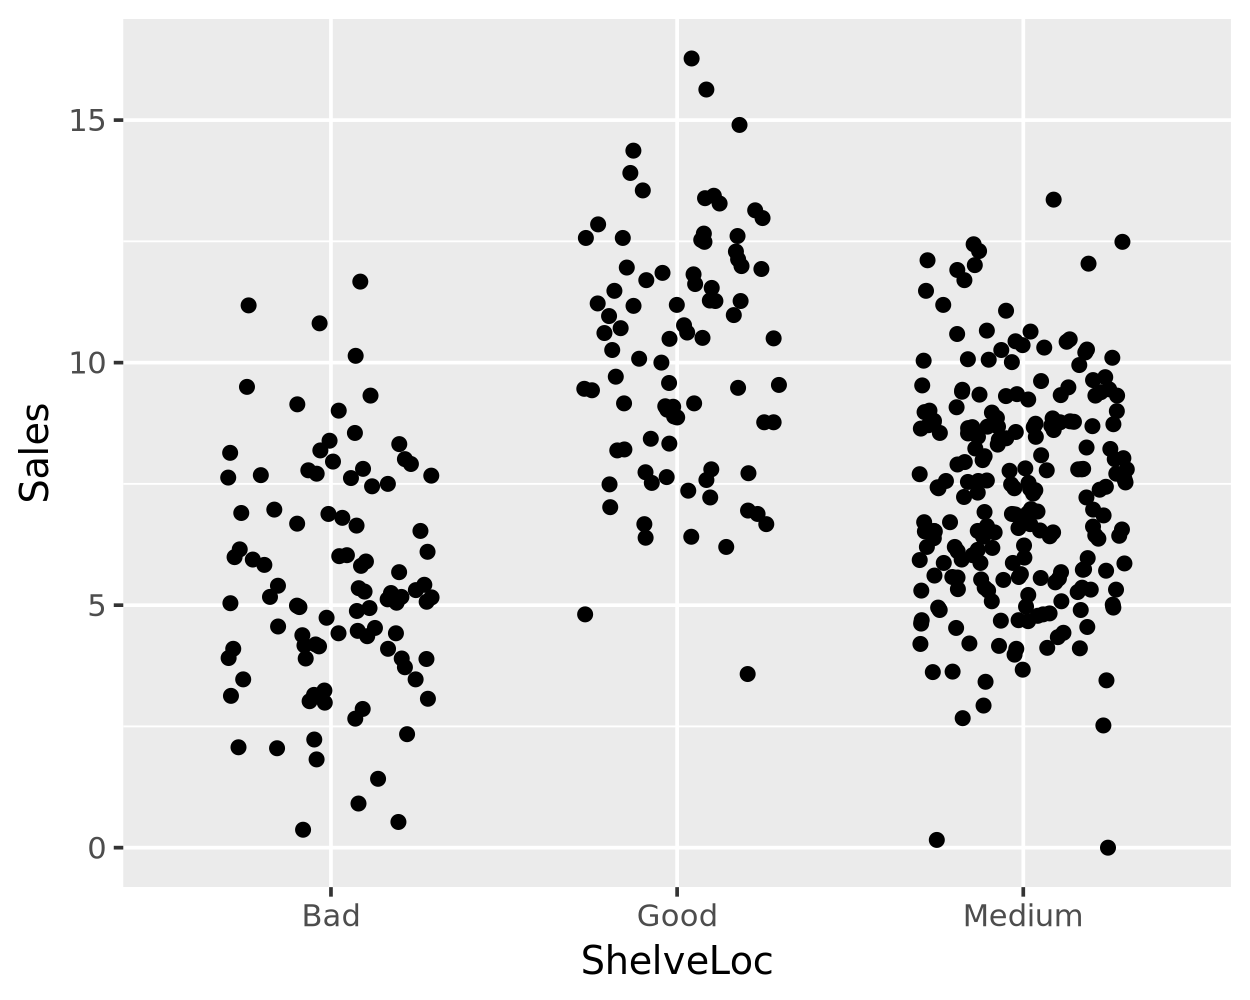

In [13]:
p = ggplot(Carseats, aes(x = ShelveLoc, y = Sales)) + 
    geom_point(position = position_jitter(width = 0.3, height = 0))

p

❓Does it look like a "Good" shelf location is associated with more car seat sales?

**Answer:** Yes, it appears that the "Good" shelf location is associated with more car seat sales

In cells below, using the `Carseats` data build a model of `Sales` with the `ShelveLoc` variable as a predictor.

**Include the following:**
- Show a regression table of your model parameters.
- Visualize the model with `ggplot2`.

📊 *Here is some example code for plotting your model.*

```r
# The code below assumes your predictions column is called ".pred" and is in a
# data frame called "Carseats2"

ggplot(Carseats2, aes(x = ShelveLoc)) + 
    geom_point(aes(y = Sales), 
               na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42)) +
    geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), 
                  color = 'coral')

```

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),5.522917,0.2387665,23.131038,1.408290e-75
ShelveLocGood,4.691083,0.3484201,13.463872,2.678712e-34
ShelveLocMedium,1.783659,0.2863562,6.228811,1.198905e-09


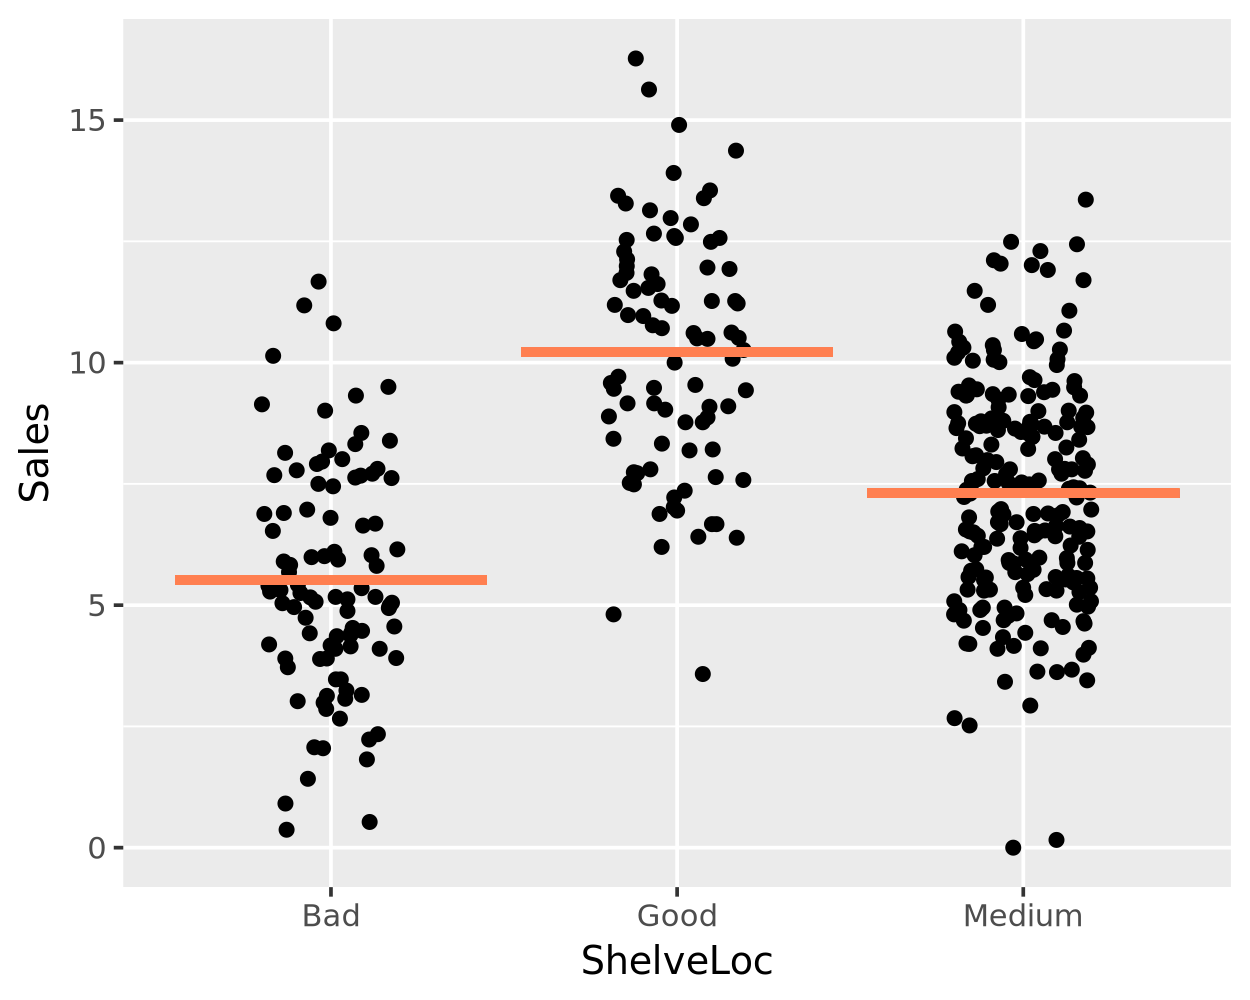

In [18]:
mod = linear_reg() %>% set_engine('lm')
mod_fit_carseats = mod  %>% fit(Sales ~ ShelveLoc, data = Carseats)
tidy(mod_fit1)
Carseats2 = augment(mod_fit_carseats, Carseats)

ggplot(Carseats2, aes(x = ShelveLoc)) + 
    geom_point(aes(y = Sales), 
               na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42)) +
    geom_crossbar(aes(y = .pred, ymin = .pred, ymax = .pred), 
                  color = 'coral')

Which `ShelveLoc` category does your intercept term represent? 

**Answer:** The intercept term represents the ShelveLoc value of "Bad". The formula for this is Sales = 5.52 + 4.69 * ShelveLocGood + 1.78 * ShelveLocMedium. The ShelveLocGood and ShelveLocMedium variables are binary. They are 1's or 0's. If the Shelve Loc predictor value is Good, the ShelveLocGood variable will be 1, which adds 4.69 to 5.52.  